In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
print("Yes the kernel work")

Yes the kernel work


In [3]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
train_df.fillna(train_df.mean(),inplace = True)
train_df.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
features = [  'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare',  'Embarked','Survived']
df = train_df[features]
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


In [11]:
temp = pd.get_dummies(df["Embarked"])
df  = pd.concat([df,temp], axis=1)

In [12]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,C,Q,S
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,1,0,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0,0,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0,0,1


In [13]:
df.drop(columns = ["Embarked"],inplace = True ,axis =1 )

In [14]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Survived,C,Q,S
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,1,0,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,0,0,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,0,0,1


In [15]:
temp1 = pd.get_dummies(df["Sex"])
df  = pd.concat([df,temp1], axis=1)

In [16]:
df.drop(columns = ["Sex"],inplace = True ,axis =1 )
df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Survived,C,Q,S,female,male
0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,0,0,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,1,0,0,1,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,1,1,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,1,1,0
4,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,0,0,1,0,1


In [17]:
df.drop(columns = ["Name"],inplace = True ,axis =1 )
df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,C,Q,S,female,male
0,3,22.0,1,0,7.2500,0,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,1,0,0,1,0
2,3,26.0,0,0,7.9250,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,1,1,0
4,3,35.0,0,0,8.0500,0,0,0,1,0,1


In [18]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived,C,Q,S,female,male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838,0.188552,0.086420,0.722783,0.352413,0.647587
std,0.836071,13.002015,1.102743,0.806057,49.693429,0.486592,0.391372,0.281141,0.447876,0.477990,0.477990
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
import seaborn as sns 


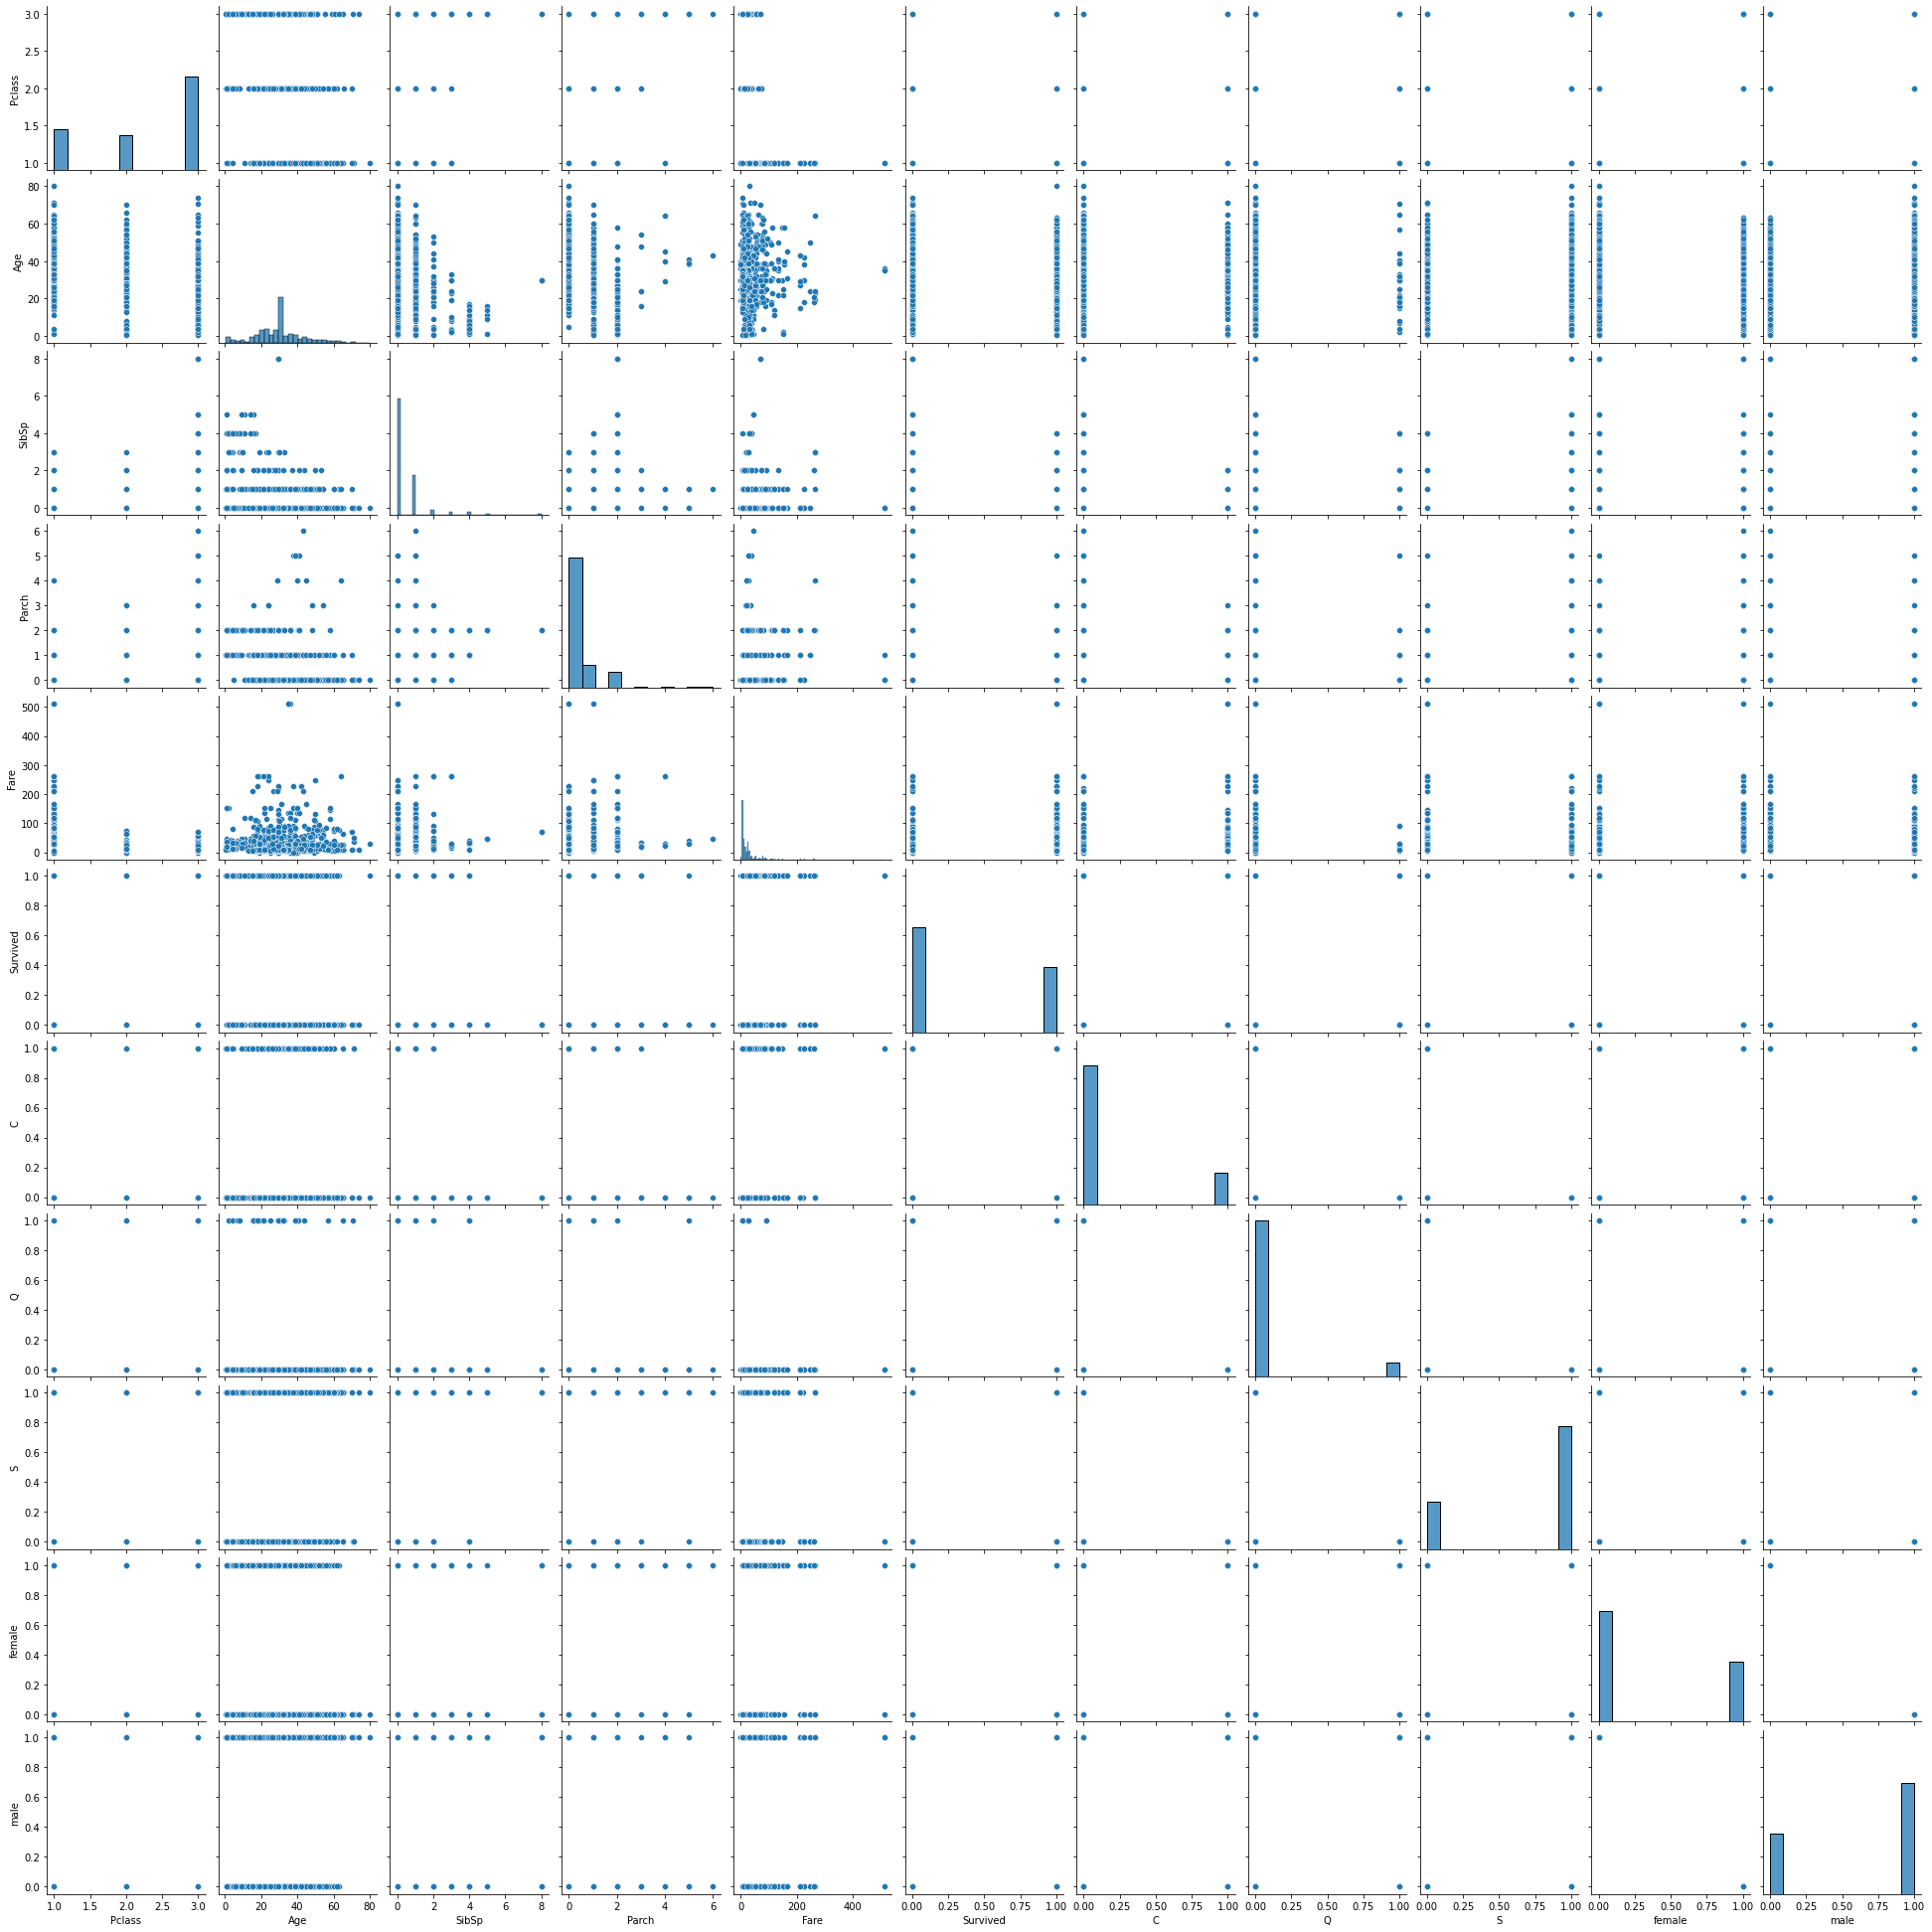

In [20]:
sns.pairplot(df)

In [21]:
temp2 = pd.get_dummies(df["Pclass"])
df  = pd.concat([df,temp2], axis=1)
df.drop(columns = ["Pclass"],inplace = True ,axis =1 )
df.head()

,Age,SibSp,Parch,Fare,Survived,C,Q,S,female,male,1,2,3
0,22.0,1,0,7.2500,0,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,1,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,1,0,1,0,0
4,35.0,0,0,8.0500,0,0,0,1,0,1,0,0,1


In [22]:
f = [     'Age',    'SibSp',    'Parch',     'Fare',        'C',
              'Q',        'S',   'female',     'male',          1,          2,
                3]
X = df[f]
Y  = df["Survived"]

In [23]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

In [24]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=4) 
print('Train set:', X_train.shape,y_train.shape)
print('Test set:', X_test.shape,y_test.shape)

Train set: (712, 12) (712,)
Test set: (179, 12) (179,)


In [25]:
from sklearn import svm
svm_model=svm.SVC(kernel = 'rbf')
svm_model.fit(X_train,y_train)

SVC()

In [26]:
yhat = svm_model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, yhat)

0.8491620111731844

In [27]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf_model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_model.fit(X_train,y_train)

y_pred=rf_model.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.8212290502793296

In [29]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)

NameError: name 'y' is not defined